# Visualize Well Cell Count Distribution

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Find the root of the git repo on the host system

In [2]:
# Get the current working directory
cwd = pathlib.Path.cwd()

if (cwd / ".git").is_dir():
    root_dir = cwd

else:
    root_dir = None
    for parent in cwd.parents:
        if (parent / ".git").is_dir():
            root_dir = parent
            break

# Check if a Git root directory was found
if root_dir is None:
    raise FileNotFoundError("No Git root directory found.")

# Inputs

In [3]:
mic_comparisons_path = root_dir / "0.data_analysis_and_processing/mic_analysis/mic_comparisons_data/well_sirna_mic_comparisons.parquet"
micdf = pd.read_parquet(mic_comparisons_path)

# Outputs

In [4]:
cell_count_path = pathlib.Path("cell_count_distribution_figures")
cell_count_path.mkdir(parents=True, exist_ok=True)

In [5]:
micdf = micdf.drop_duplicates(subset=["Metadata_Plate", "Metadata_Well"])

In [6]:
print(micdf)

        mic_e Metadata_Plate Metadata_Well Metadata_Condition  \
0    0.857133         slide1            A1                NTC   
18   0.757082         slide1            A2            ALY kd8   
36   0.830519         slide1            A3          SART1 kd6   
54   0.621573         slide1            A4           FIBP kd7   
72   0.820112         slide1            B1            ALY kd5   
90   0.782552         slide1            B2          SART1 kd4   
108  0.757082         slide1            B3           FIBP kd6   
126  0.782552         slide1            B4          untreated   
144  0.818074         slide2            A1                NTC   
162  0.791746         slide2            A2         DDX39A kd4   
180  0.857133         slide2            A3          SARNP kd9   
198  0.709443         slide2            A4        TMEM259 kd6   
216  0.678485         slide2            B1         DDX39A kd1   
234  0.730308         slide2            B2          SARNP kd3   
252  0.576689         sli

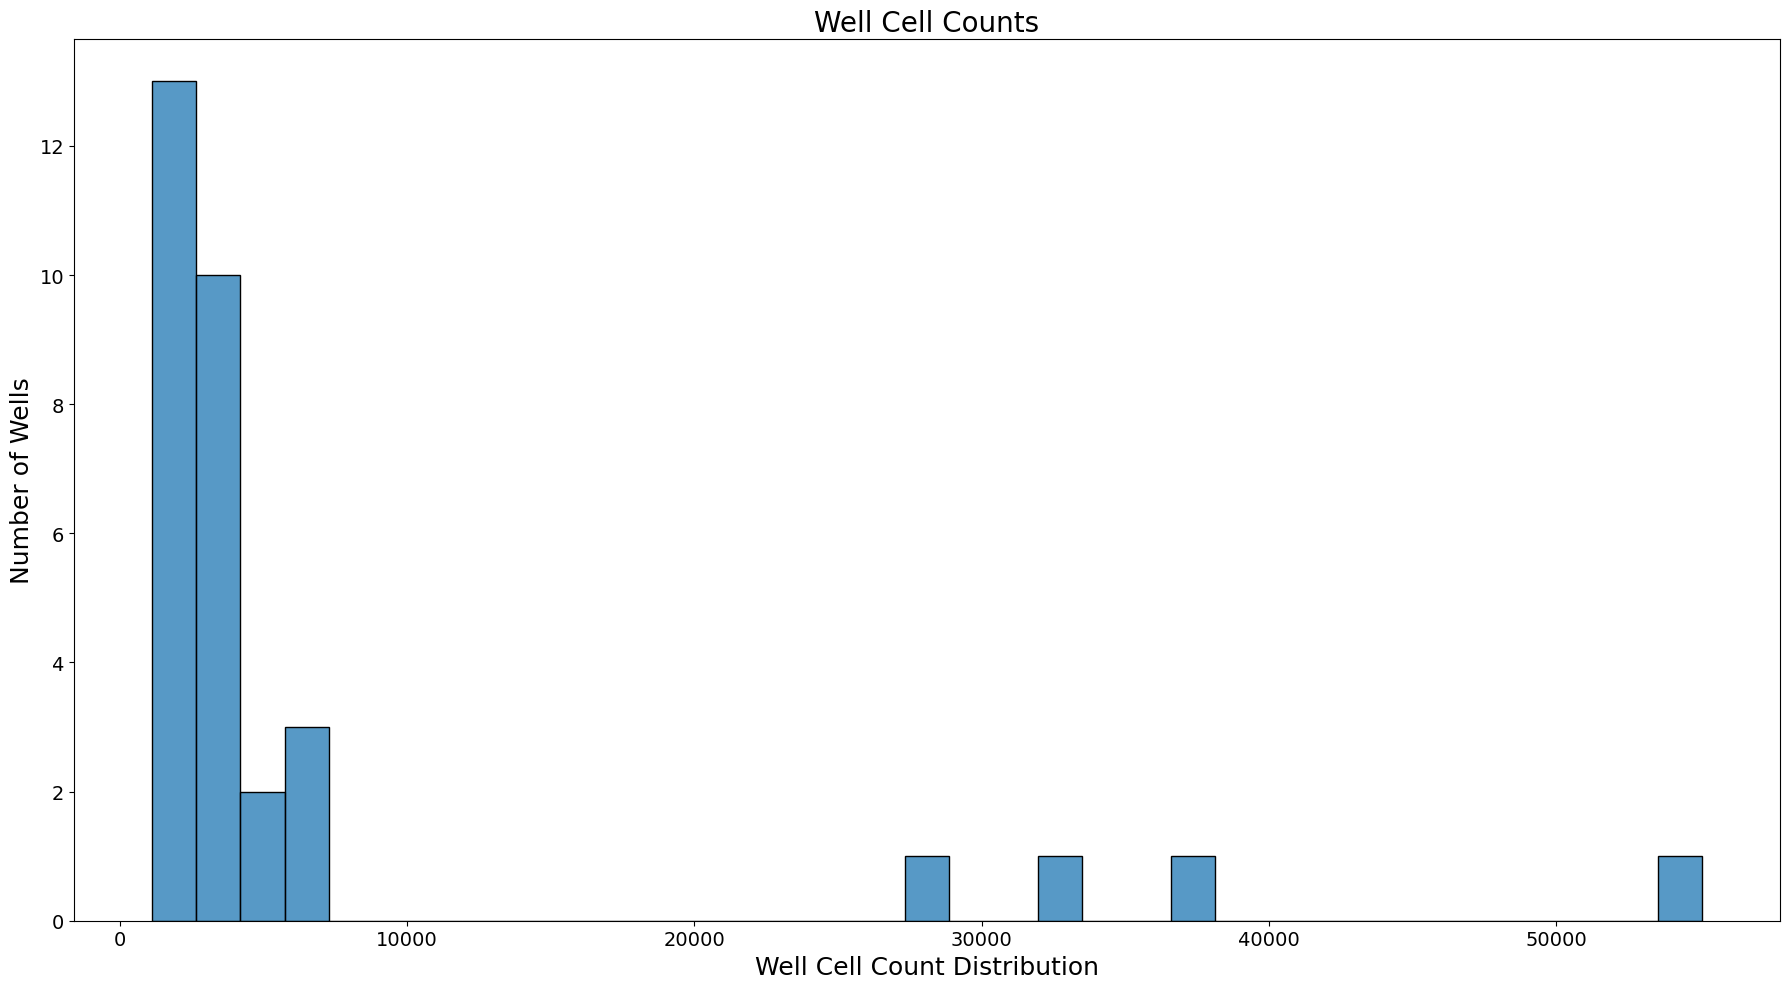

In [7]:
plt.figure(figsize=(18, 10))
sns.histplot(data=micdf, x="Metadata_Cell_Count", kde=False)
plt.xlabel("Well Cell Count Distribution", fontsize=18)
plt.ylabel("Number of Wells", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Well Cell Counts", fontsize=20)
plt.tight_layout()

plt.savefig(cell_count_path / "well_cell_counts.png")